In [29]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns
import plotly.express as px
df = pd.read_csv("Lmex_left.csv",sep=",")
# Remove the percentage sign and convert the column to numeric
df['Query coverage'] = df['Query coverage'].str.rstrip('%').astype(float)
# Extract the first part before underscore from the 'Name' column
df['Barcode'] = df['Name'].str.extract(r'^(\d{2})_')
df['Read'] = df['Name'].str.extract(r'^(\d{2})_')
df['read'] = df['Name'].str.split().str[0]
df["chromosome"] = df['Query'].str.extract(r'LmxM\.(\d+)_left')
# Filter the DataFrame for values less than 30% and  Query start less than 50
df = df[(df['Query coverage'] < 30) & (df["Query start"] < 50)] 


In [34]:
import plotly.express as px
# Define the desired order of barcodes
barcode_order = ["15", "16", "17", "18", "19"]

fig = px.box(df, x="Barcode", y="Hit start", points="outliers", title="Overhang length", hover_name = "read",category_orders={"Barcode": barcode_order})
fig.show()

In [51]:
def boxbarcode(b):
    dfb = df[df['Barcode'] == b]
    chr_order = ["01", "02", "03", "04", "05","06", "07", "08", "09", "10","11", "12", "13", "14", "15","16", "17", "18", "19", "20","21", "22", "23", "24", "25","26", "27", "28", "29", "30","31", "32", "33", "34"]

    fig = px.box(dfb, x="chromosome", y="Hit start", points="outliers", title=f"Overhang length for barcode {b}", hover_name = "read",category_orders={"chromosome": chr_order})
    fig.show()
boxbarcode("15")


In [53]:
boxbarcode("16")


In [54]:
boxbarcode("17")


In [56]:
boxbarcode("18")

In [57]:
boxbarcode("19")

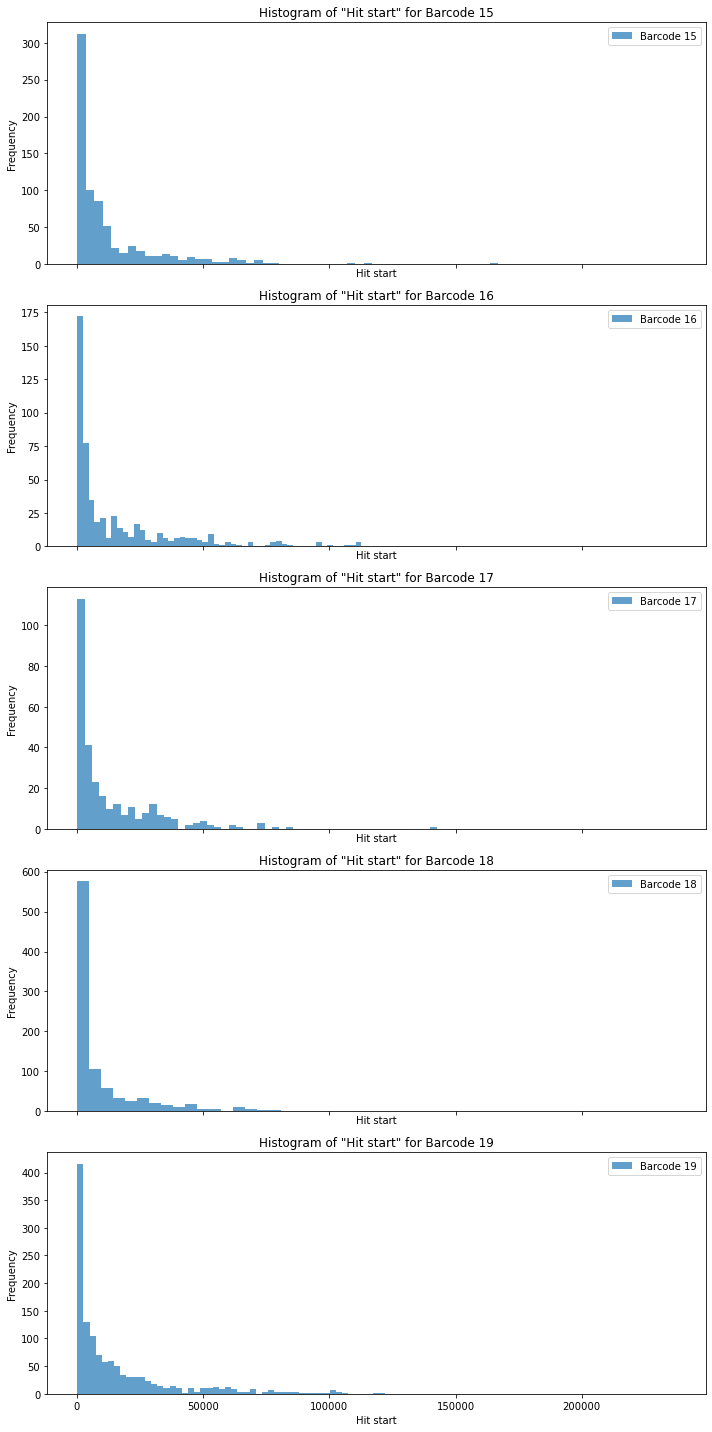

In [10]:
# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 20),sharex=True)

# Iterate over unique barcode values
for i, barcode in enumerate(sorted(df["Barcode"].unique())):
    # Filter DataFrame for current barcode value
    subset = df[df["Barcode"] == barcode]
    # Plot histogram on current subplot
    axs[i].hist(subset["Hit start"], bins=50, alpha=0.7, label=f'Barcode {barcode}')
    axs[i].set_title(f'Histogram of "Hit start" for Barcode {barcode}')
    axs[i].set_xlabel("Hit start")
    axs[i].set_ylabel("Frequency")
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [61]:
def boxchr(ch):
    dfch = df[df['chromosome'] == ch]
    b_order = ["15", "16", "17", "18", "19"]

    fig = px.box(dfch, x="Barcode", y="Hit start", points="outliers", title=f"Overhang length for chromsome {ch} left arm", hover_name = "read",category_orders={"Barcode": b_order})
    fig.show()


chr_order = ["01", "02", "03", "04", "05","06", "07", "08", "09", "10","11", "12", "13", "14", "15","16", "17", "18", "19", "20","21", "22", "23", "24", "25","26", "27", "28", "29", "30","31", "32", "33", "34"]
for i in chr_order:
    boxchr(i)